# Tema II: Árboles de Decisión y Ensambles
Este notebook aplica modelos de clasificación utilizando el dataset **Bank Marketing** del UCI.

**Objetivos:**
- Utilizar árboles de decisión para clasificar clientes potenciales.
- Comparar modelos de Decision Tree, Random Forest y Gradient Boosting.
- Evaluar el rendimiento con métricas estándar.

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Los datos se relacionan con campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable objetivo y).

In [2]:
# Carga del dataset
direc = '/Users/leydi/MC Apli/bank-additional-full.csv'
df = pd.read_csv(direc,sep =';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


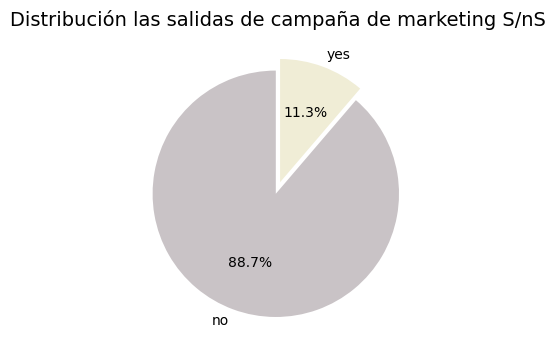

In [6]:
col2 = ['#C9C3C6','#F0EDD6']

# declaring exploding pie 
explode = [0.05, 0.05] 
# 1. Agrupar y contar categorías
frequencies = df['y'].value_counts()

# 2. Graficar el pie chart
frequencies.plot.pie(autopct='%1.1f%%', figsize=(4, 4), startangle=90,colors = col2, explode = explode )

# 3. Añadir título
plt.title("Distribución las salidas de campaña de marketing S/nS", fontsize=14)
plt.ylabel('')  # Opcional: elimina etiqueta del eje Y
plt.show()


In [7]:
df = pd.get_dummies(df, drop_first=True)  # Codificación one-hot
df['y'] = df['y_yes']
df.drop(columns=['y_yes'], inplace=True)

In [8]:
# Separación de variables
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12556,40,94,2,999,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,0,1,0,0,0,1,0
35451,31,116,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,1,0,0,0,1,0,0,0,1,0
30592,59,13,6,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,1,0,0,0,1,0,0,0,0,0
17914,43,94,5,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,0,1,0,1,0
3315,39,344,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,427,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
11284,37,288,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
38158,35,194,1,4,1,-3.4,92.431,-26.9,0.754,5017.5,...,0,0,1,0,0,1,0,0,0,1
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,0,0,0,1,1,0


In [10]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)

#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8868657441126487


In [14]:
# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9119932022335518


In [15]:
# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9196406894877397


In [16]:
#Resumen de los valores obtenidos:
resultados1 = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3)], 
      
    } )                               
resultados1

,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.887,0.502,0.512,0.523
1,RandomF,0.912,0.650,0.557,0.487
2,GBoost,0.920,0.690,0.600,0.530


# Hagamos un exploracion de la data

In [19]:
# Carga del dataset
direc = '/Users/leydi/MC Apli/bank-additional-full.csv'
df = pd.read_csv(direc,sep =';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
import numpy as np
def plot_numerical_histograms(df, bins=30, figsize_per_plot=(6, 4)):
    """
    Genera y muestra histogramas para todas las variables numéricas en un DataFrame.

    Parámetros:
    -----------
    df : pd.DataFrame
        El DataFrame que contiene los datos.
    bins : int, optional
        El número de bins (barras) para el histograma. Por defecto es 30.
    figsize_per_plot : tuple, optional
        El tamaño (ancho, alto) de cada histograma individual. Por defecto es (6, 4).
    """

    # Identificar columnas numéricas
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_cols:
        print("No se encontraron columnas numéricas en el DataFrame.")
        return

    print(f"Generando histogramas para {len(numerical_cols)} variables numéricas...")

    # Calcular el número de filas y columnas para la cuadrícula de subplots
    # Usaremos 3 columnas por fila, o menos si hay pocas variables
    num_cols_per_row = 3
    num_rows = int(np.ceil(len(numerical_cols) / num_cols_per_row))

    # Crear la figura y los subplots
    # Ajustamos el tamaño total de la figura basado en el número de plots individuales
    plt.figure(figsize=(num_cols_per_row * figsize_per_plot[0], num_rows * figsize_per_plot[1]))

    for i, col in enumerate(numerical_cols):
        ax = plt.subplot(num_rows, num_cols_per_row, i + 1) # i + 1 porque subplot es 1-indexado
        
        # Usar histplot de seaborn
        sns.histplot(data=df, x=col, bins=bins, kde=True, ax=ax)
        
        ax.set_title(f'Distribución de {col}', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frecuencia', fontsize=10)
        ax.tick_params(axis='x', rotation=45) # Rotar etiquetas del eje x si son largas

    plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para que quepan en el área de la figura
    plt.show()

Generando histogramas para 10 variables numéricas...


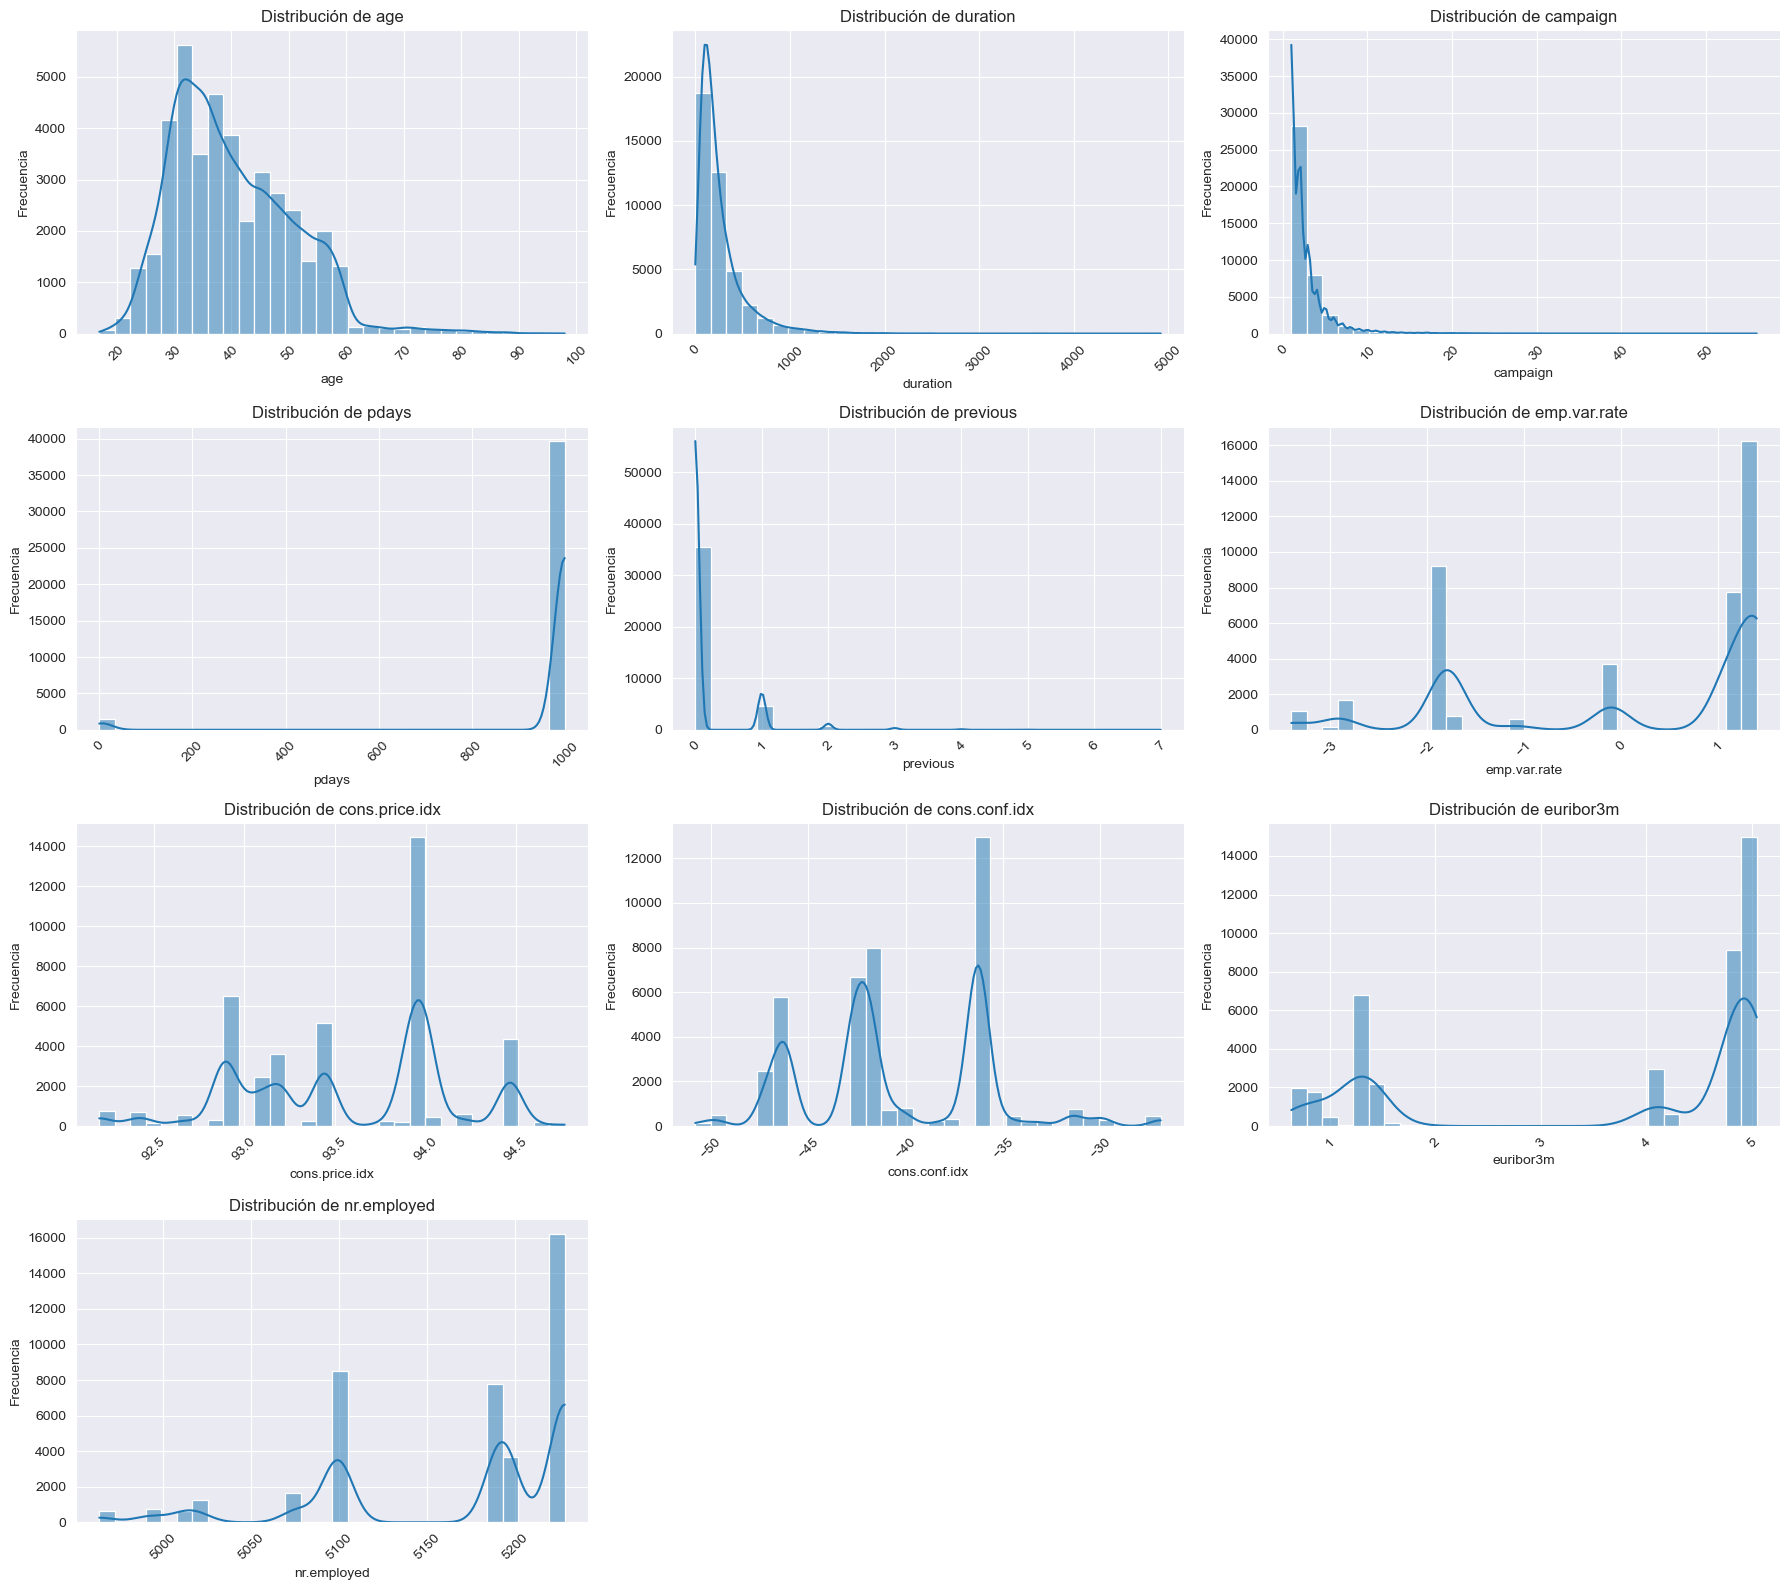

In [104]:
plot_numerical_histograms(df, bins=30, figsize_per_plot=(6, 4))

Text(0.5, 1.0, 'Distribucion edad por y/n deposit divido por prestamo casa')

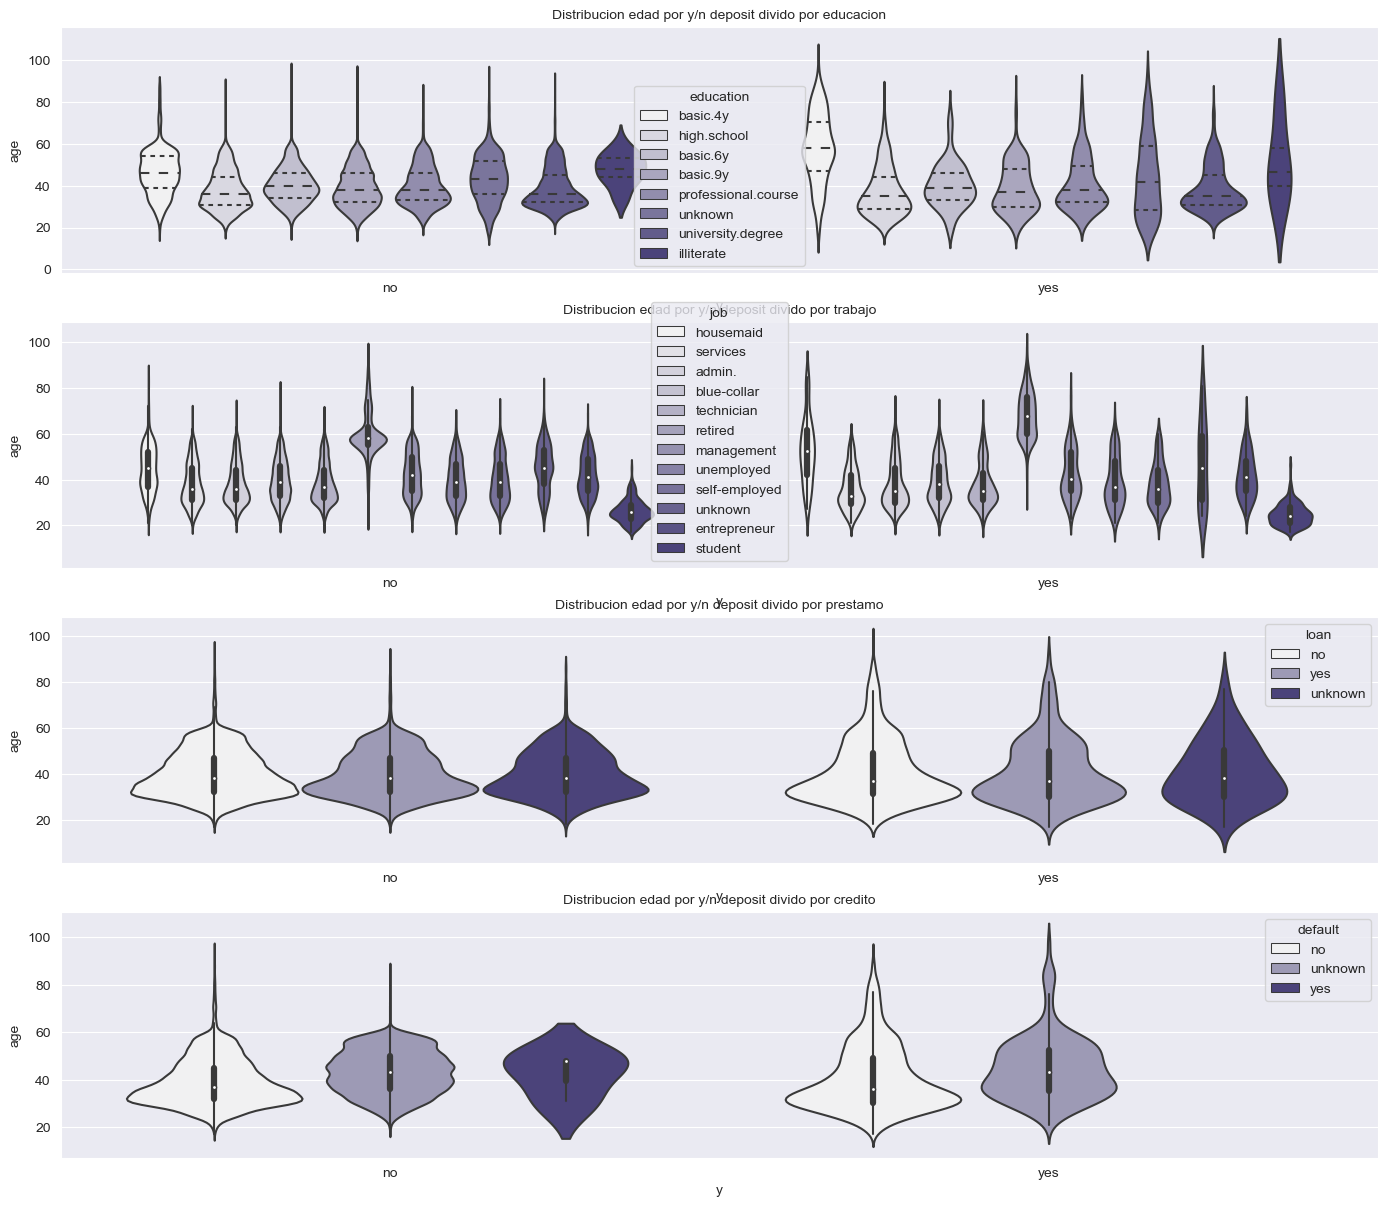

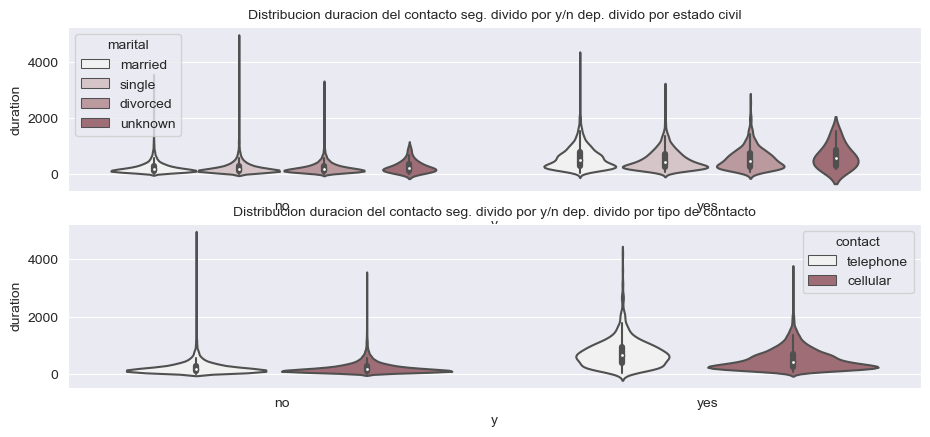

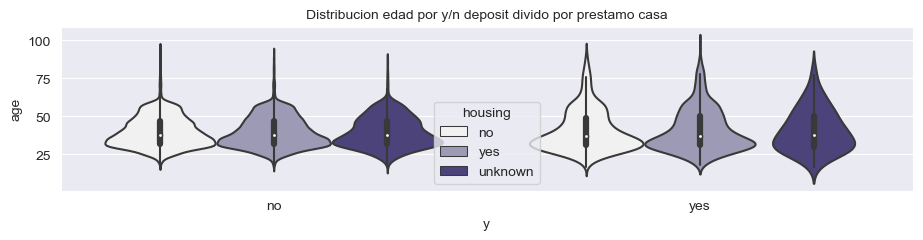

In [105]:
sns.set_style("darkgrid")
fig = plt.figure(figsize= (17, 30))
ax1 = fig.add_subplot(8,1,1)
ax1=sns.violinplot(data = df, y ='age', x = 'y', hue = 'education', color = '#443A83',kde = True, inner = 'quartile')
# Añadir títulos y etiquetas
plt.title('Distribucion edad por y/n deposit divido por educacion', fontsize=10)

ax2 = fig.add_subplot(8,1,2)
ax2=sns.violinplot(data = df, y ='age', x = 'y', hue = 'job', color = '#443A83',kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion edad por y/n deposit divido por trabajo', fontsize=10)

ax7 = fig.add_subplot(8,1,3)
ax7=sns.violinplot(data = df, y ='age', x = 'y', hue = 'loan', color = '#443A83',kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion edad por y/n deposit divido por prestamo', fontsize=10)

ax6 = fig.add_subplot(8,1,4)
ax6=sns.violinplot(data = df, y ='age', x = 'y', hue = 'default', color = '#443A83',kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion edad por y/n deposit divido por credito', fontsize=10)

fig = plt.figure(figsize= (11, 20))
ax3 = fig.add_subplot(8,1,5)
ax3=sns.violinplot(data=df, y = 'duration', x = 'y', hue= 'marital', color = '#A76571', kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion duracion del contacto seg. divido por y/n dep. divido por estado civil', fontsize=10)

ax4 = fig.add_subplot(8,1,6)
ax4=sns.violinplot(data=df, y = 'duration', x = 'y', hue= 'contact', color = '#A76571', kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion duracion del contacto seg. divido por y/n dep. divido por tipo de contacto', fontsize=10)

fig = plt.figure(figsize= (11, 20))
ax5 = fig.add_subplot(8,1,7)
ax5=sns.violinplot(data = df, y ='age', x = 'y', hue = 'housing', color = '#443A83',kde = True)
# Añadir títulos y etiquetas
plt.title('Distribucion edad por y/n deposit divido por prestamo casa', fontsize=10)


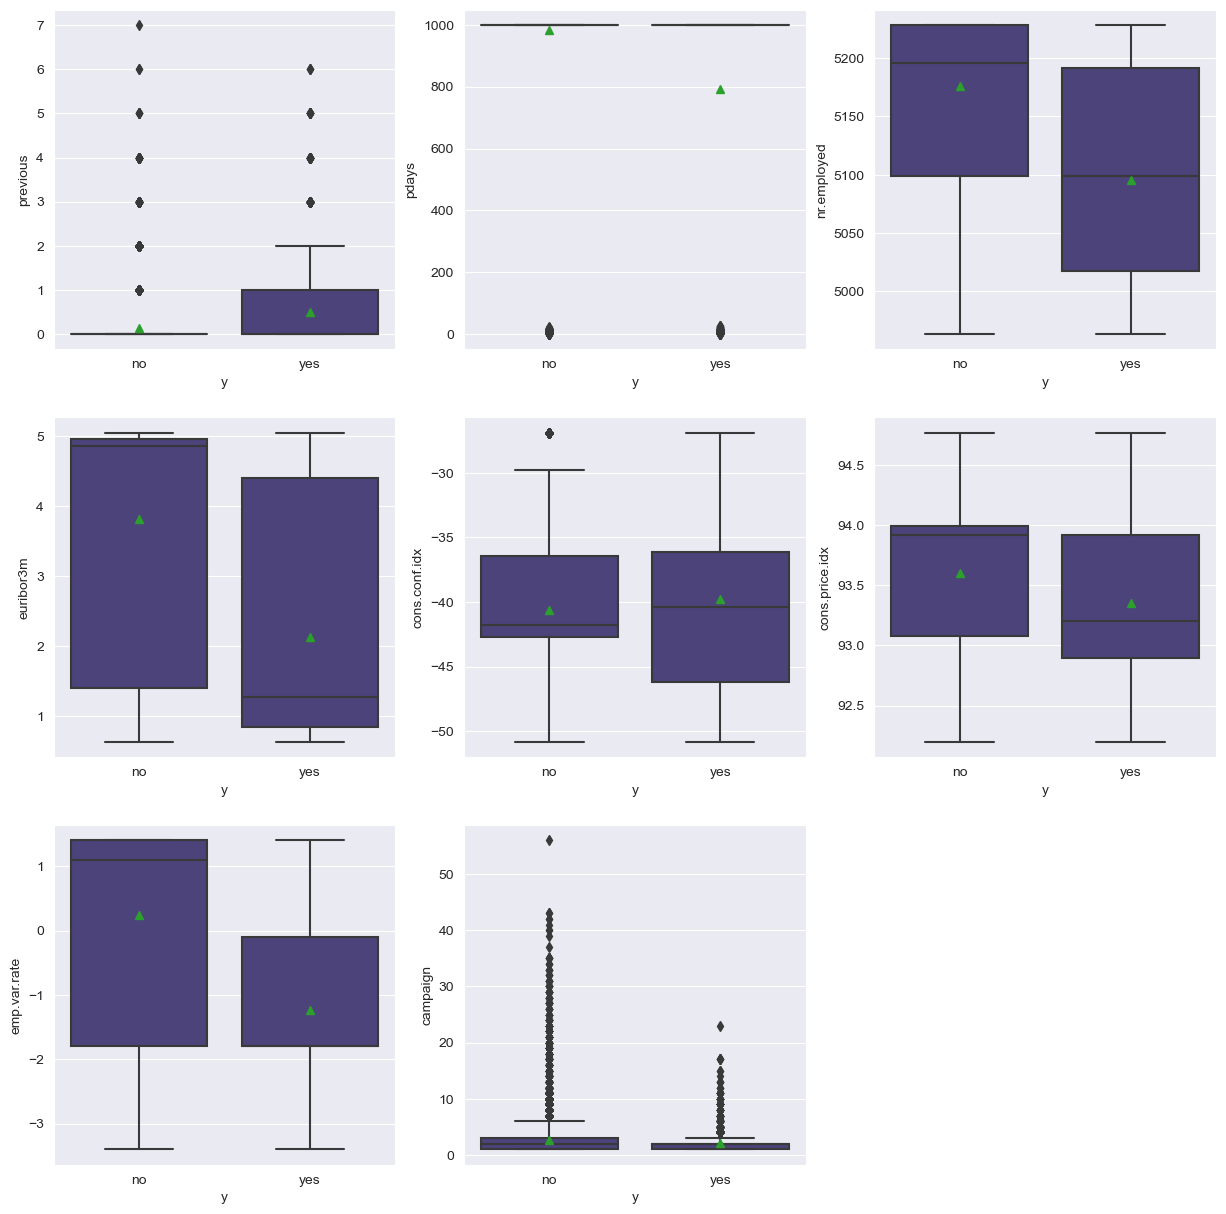

In [107]:
fig = plt.figure(figsize= (15, 15))
ax1 = fig.add_subplot(3,3,1)
ax1=sns.boxplot(data = df, y ='previous', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas

ax2 = fig.add_subplot(3,3,2)
ax2=sns.boxplot(data = df, y ='pdays', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas

ax3 = fig.add_subplot(3,3,3)
ax3=sns.boxplot(data = df, y ='nr.employed', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas


ax4 = fig.add_subplot(3,3,4)
ax4=sns.boxplot(data = df, y ='euribor3m', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas


ax5 = fig.add_subplot(3,3,5)
ax5=sns.boxplot(data = df, y ='cons.conf.idx', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas


ax6 = fig.add_subplot(3,3,6)
ax6=sns.boxplot(data = df, y ='cons.price.idx', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas


ax7 = fig.add_subplot(3,3,7)
ax7=sns.boxplot(data = df, y ='emp.var.rate', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas

ax8 = fig.add_subplot(3,3,8)
ax8=sns.boxplot(data = df, y ='campaign', x = 'y', color = '#443A83', showmeans=True)
# Añadir títulos y etiquetas


In [92]:
#Convertimos la variable pdays
df['pdays'].replace(to_replace=[999], value=['non_contacted'], inplace=True)

In [93]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,27,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,non_contacted,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,39673,35563,36548


Analizamos los valores categoricos

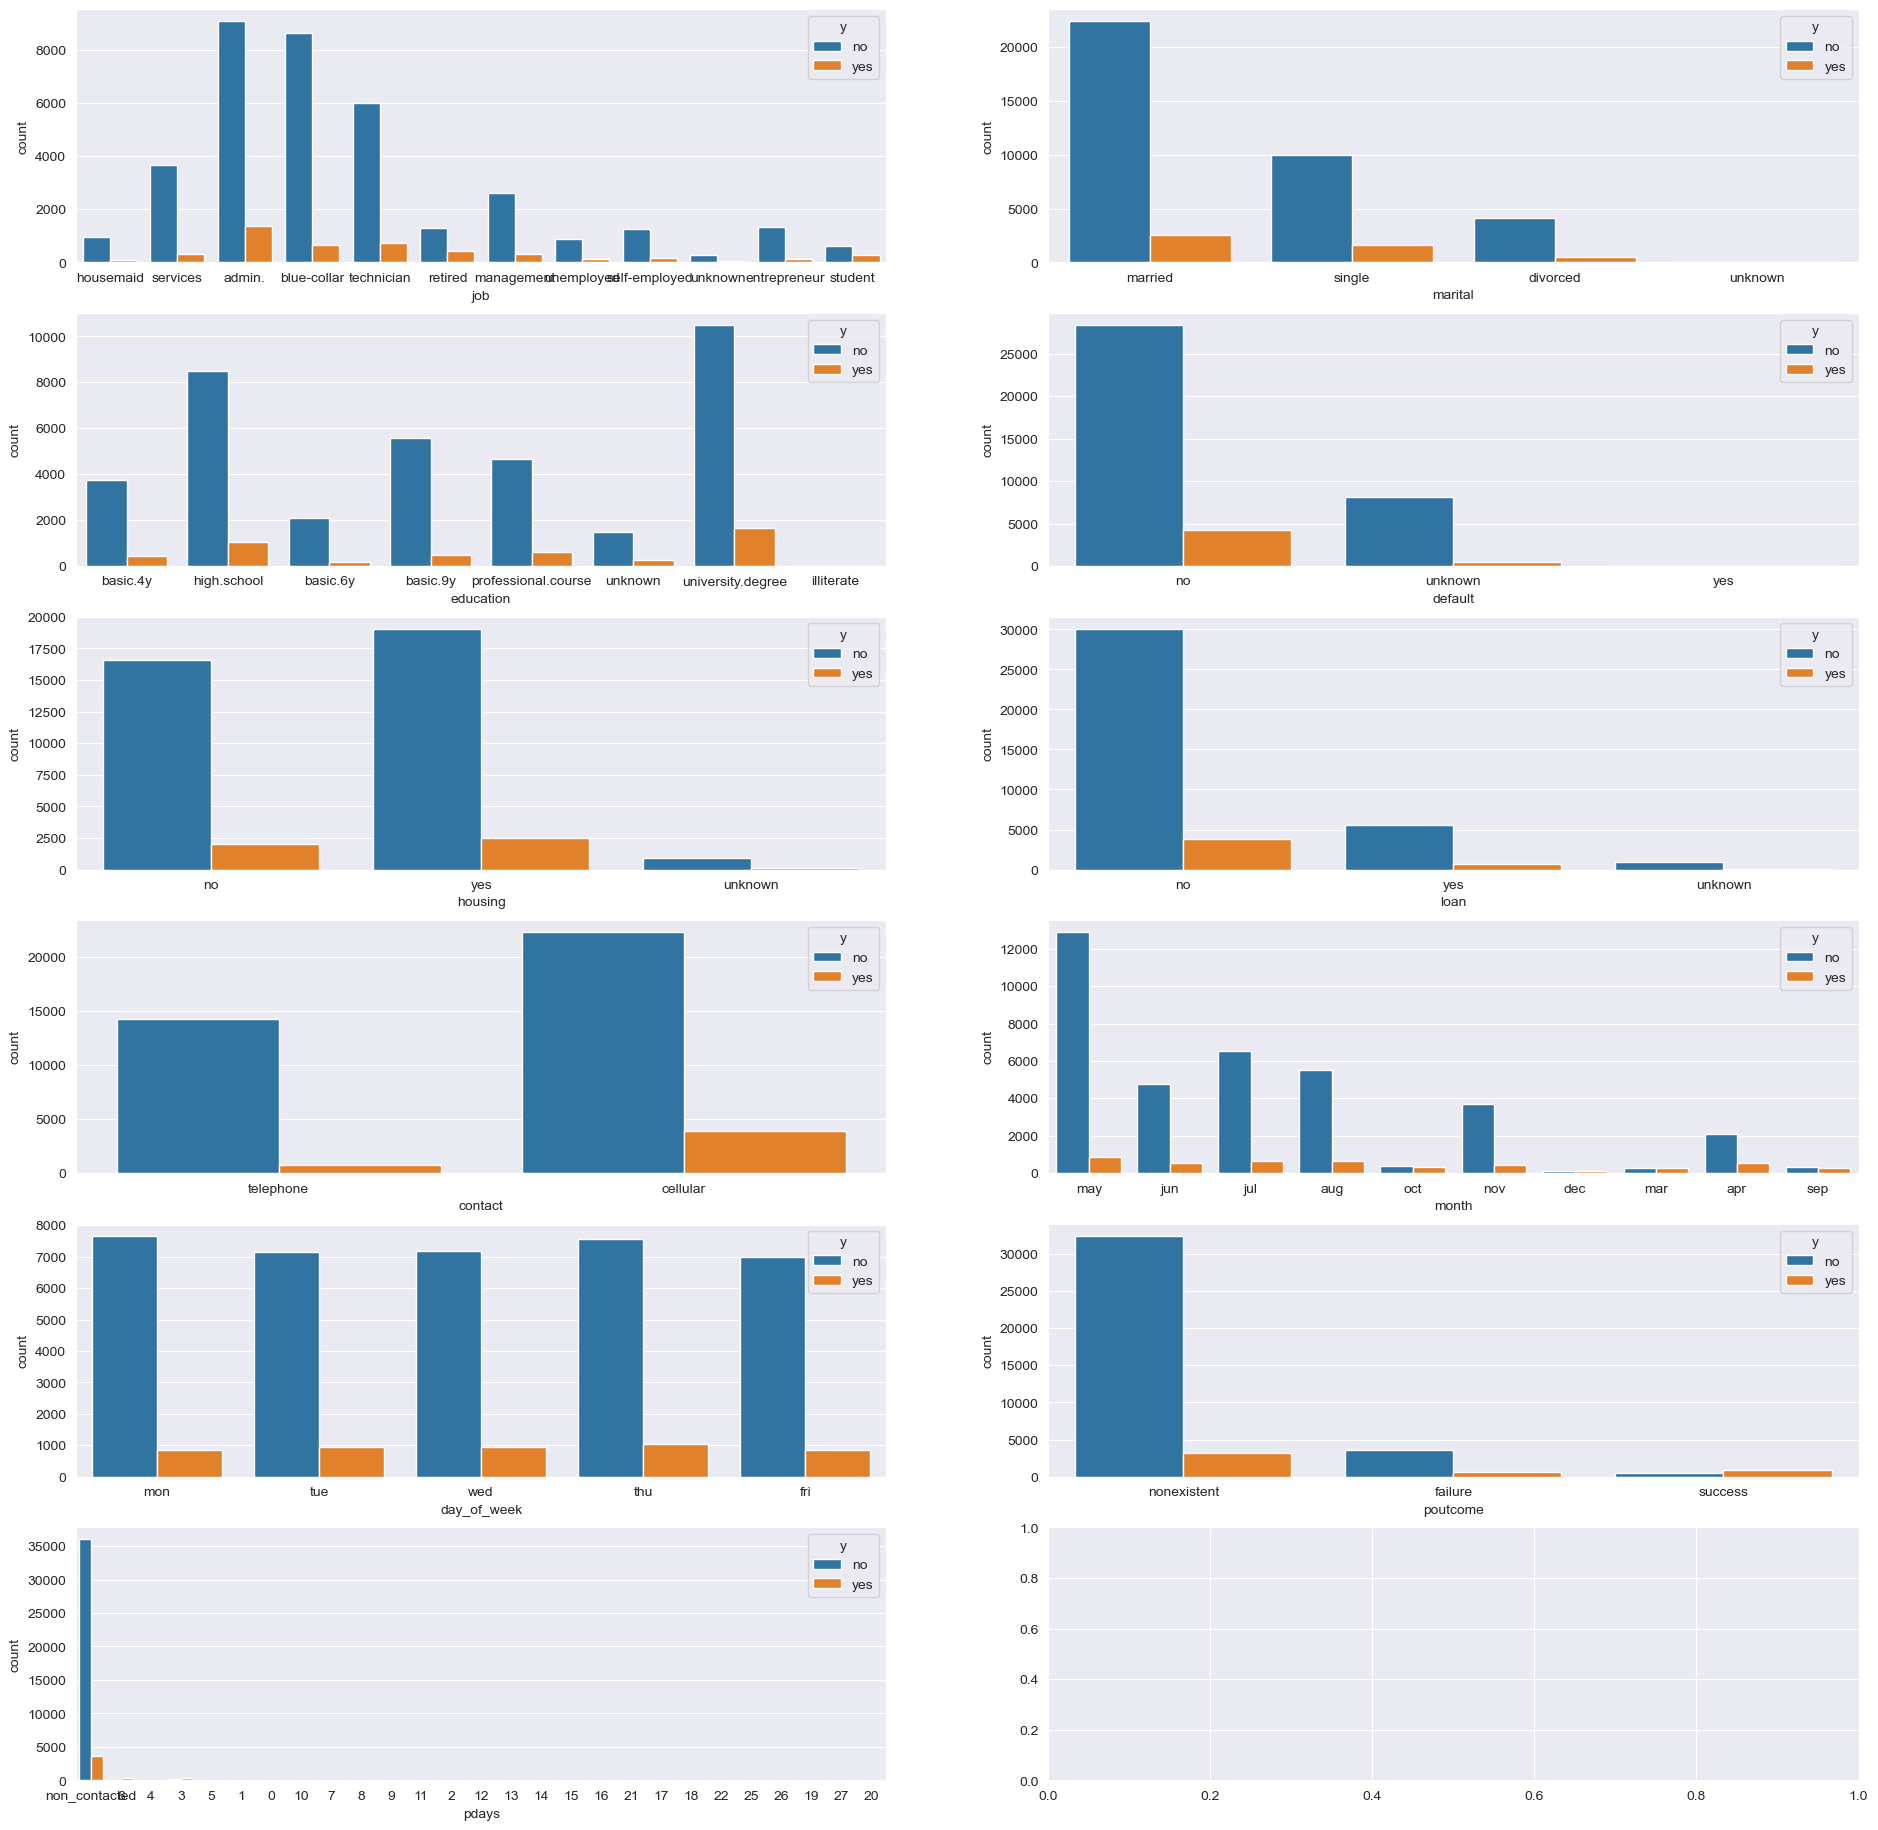

In [96]:
columns_cat = df.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(23, 23))

for var, ax in zip(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','pdays'], axs.flatten()):
    sns.countplot(data=df, x=var,hue='y', ax=ax)

In [98]:
from scipy.stats import chi2_contingency
import numpy as np

def aplicar_chi_cuadrado(df, columna_categorica, columna_objetivo_categorica, umbral_p_valor=0.05):
    """
    Aplica el test de Chi-Cuadrado para evaluar la independencia entre una
    columna categórica y la columna objetivo categórica de un DataFrame.

    Parámetros:
    -----------
    df : pd.DataFrame
        El DataFrame que contiene las columnas.
    columna_categorica : str
        El nombre de la columna categórica a evaluar.
    columna_objetivo_categorica : str
        El nombre de la columna objetivo categórica.
    umbral_p_valor : float, opcional
        El nivel de significancia (alfa) para rechazar la hipótesis nula. Por defecto es 0.05.

    Retorna:
    --------
    dict
        Un diccionario con los resultados del test:
        - 'columna_evaluada': Nombre de la característica.
        - 'columna_objetivo': Nombre de la variable objetivo.
        - 'chi2_statistic': El valor de la estadística Chi-Cuadrado.
        - 'p_value': El p-valor resultante del test.
        - 'grados_libertad': Grados de libertad del test.
        - 'es_significativa': Booleano que indica si la relación es estadísticamente significativa.
        - 'mensaje': Un mensaje interpretativo del resultado.
    """

    if columna_categorica not in df.columns:
        raise ValueError(f"La columna '{columna_categorica}' no se encuentra en el DataFrame.")
    if columna_objetivo_categorica not in df.columns:
        raise ValueError(f"La columna objetivo '{columna_objetivo_categorica}' no se encuentra en el DataFrame.")

    # Crear la tabla de contingencia
    # La tabla debe contar las ocurrencias de cada combinación de categorías
    tabla_contingencia = pd.crosstab(df[columna_categorica], df[columna_objetivo_categorica])

    # Asegurarse de que la tabla no esté vacía o tenga columnas/filas con ceros totales
    if tabla_contingencia.empty or (tabla_contingencia.sum(axis=0) == 0).any() or (tabla_contingencia.sum(axis=1) == 0).any():
        return {
            'columna_evaluada': columna_categorica,
            'columna_objetivo': columna_objetivo_categorica,
            'chi2_statistic': np.nan,
            'p_value': np.nan,
            'grados_libertad': np.nan,
            'es_significativa': False,
            'mensaje': f"Tabla de contingencia vacía o con filas/columnas con sumas cero para '{columna_categorica}' y '{columna_objetivo_categorica}'. No se puede realizar el test."
        }

    # Aplicar el test de Chi-Cuadrado
    chi2_statistic, p_value, grados_libertad, _ = chi2_contingency(tabla_contingencia)

    es_significativa = p_value < umbral_p_valor
    mensaje = (
        f"La relación entre '{columna_categorica}' y '{columna_objetivo_categorica}' es estadísticamente significativa (p < {umbral_p_valor})."
        if es_significativa
        else f"La relación entre '{columna_categorica}' y '{columna_objetivo_categorica}' NO es estadísticamente significativa (p >= {umbral_p_valor})."
    )

    return {
        'columna_evaluada': columna_categorica,
        'columna_objetivo': columna_objetivo_categorica,
        'chi2_statistic': chi2_statistic,
        'p_value': p_value,
        'grados_libertad': grados_libertad,
        'es_significativa': es_significativa,
    }

def evaluar_todas_categoricas_chi2(df, columnas_categoricas, columna_objetivo_categorica, umbral_p_valor=0.05):
    """
    Evalúa todas las columnas categóricas dadas contra una columna objetivo categórica
    usando el test de Chi-Cuadrado.

    Parámetros:
    -----------
    df : pd.DataFrame
        El DataFrame.
    columnas_categoricas : list
        Una lista de nombres de columnas categóricas a evaluar.
    columna_objetivo_categorica : str
        El nombre de la columna objetivo categórica.
    umbral_p_valor : float, opcional
        El nivel de significancia (alfa). Por defecto es 0.05.

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con los resultados de cada test.
    """
    resultados = []
    for col in columnas_categoricas:
        if col == columna_objetivo_categorica: # Evitar comparar la columna consigo misma
            continue
        resultado = aplicar_chi_cuadrado(df, col, columna_objetivo_categorica, umbral_p_valor)
        resultados.append(resultado)
    return pd.DataFrame(resultados)

In [99]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [100]:
columnas_a_evaluar = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','pdays']
columna_objetivo = 'y'

print("Evaluando todas las características categóricas vs. 'y':")
resultados_df = evaluar_todas_categoricas_chi2(df, columnas_a_evaluar, columna_objetivo)
print(resultados_df)

Evaluando todas las características categóricas vs. 'y':
   columna_evaluada columna_objetivo  chi2_statistic        p_value  \
0               job                y      961.242440  4.189763e-199   
1           marital                y      122.655152   2.068015e-26   
2         education                y      193.105905   3.305189e-38   
3           default                y      406.577515   5.161958e-89   
4           housing                y        5.684496   5.829448e-02   
5              loan                y        1.094028   5.786753e-01   
6           contact                y      862.318364  1.525986e-189   
7             month                y     3101.149351   0.000000e+00   
8       day_of_week                y       26.144939   2.958482e-05   
9          poutcome                y     4230.523798   0.000000e+00   
10            pdays                y     4480.249822   0.000000e+00   

    grados_libertad  es_significativa  
0                11              True  
1         

Tomamos en cuenta las características más importantes, haciendo feature engineering. 

In [17]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [20]:
df = df.drop(['marital','education','housing','loan','day_of_week','campaign','cons.price.idx','cons.conf.idx'], axis =1)

In [21]:
df.head()

,age,job,default,contact,month,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,56,housemaid,no,telephone,may,261,999,0,nonexistent,1.1,4.857,5191.0,no
1,57,services,unknown,telephone,may,149,999,0,nonexistent,1.1,4.857,5191.0,no
2,37,services,no,telephone,may,226,999,0,nonexistent,1.1,4.857,5191.0,no
3,40,admin.,no,telephone,may,151,999,0,nonexistent,1.1,4.857,5191.0,no
4,56,services,no,telephone,may,307,999,0,nonexistent,1.1,4.857,5191.0,no


In [22]:
# Preprocesamiento básico
df = pd.get_dummies(df, drop_first=True)  # Codificación one-hot
df['y'] = df['y_yes']
df.drop(columns=['y_yes'], inplace=True)

In [23]:
df.head()

,age,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y
0,56,261,999,0,1.1,4.857,5191.0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,57,149,999,0,1.1,4.857,5191.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,999,0,1.1,4.857,5191.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,999,0,1.1,4.857,5191.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,999,0,1.1,4.857,5191.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<Axes: >

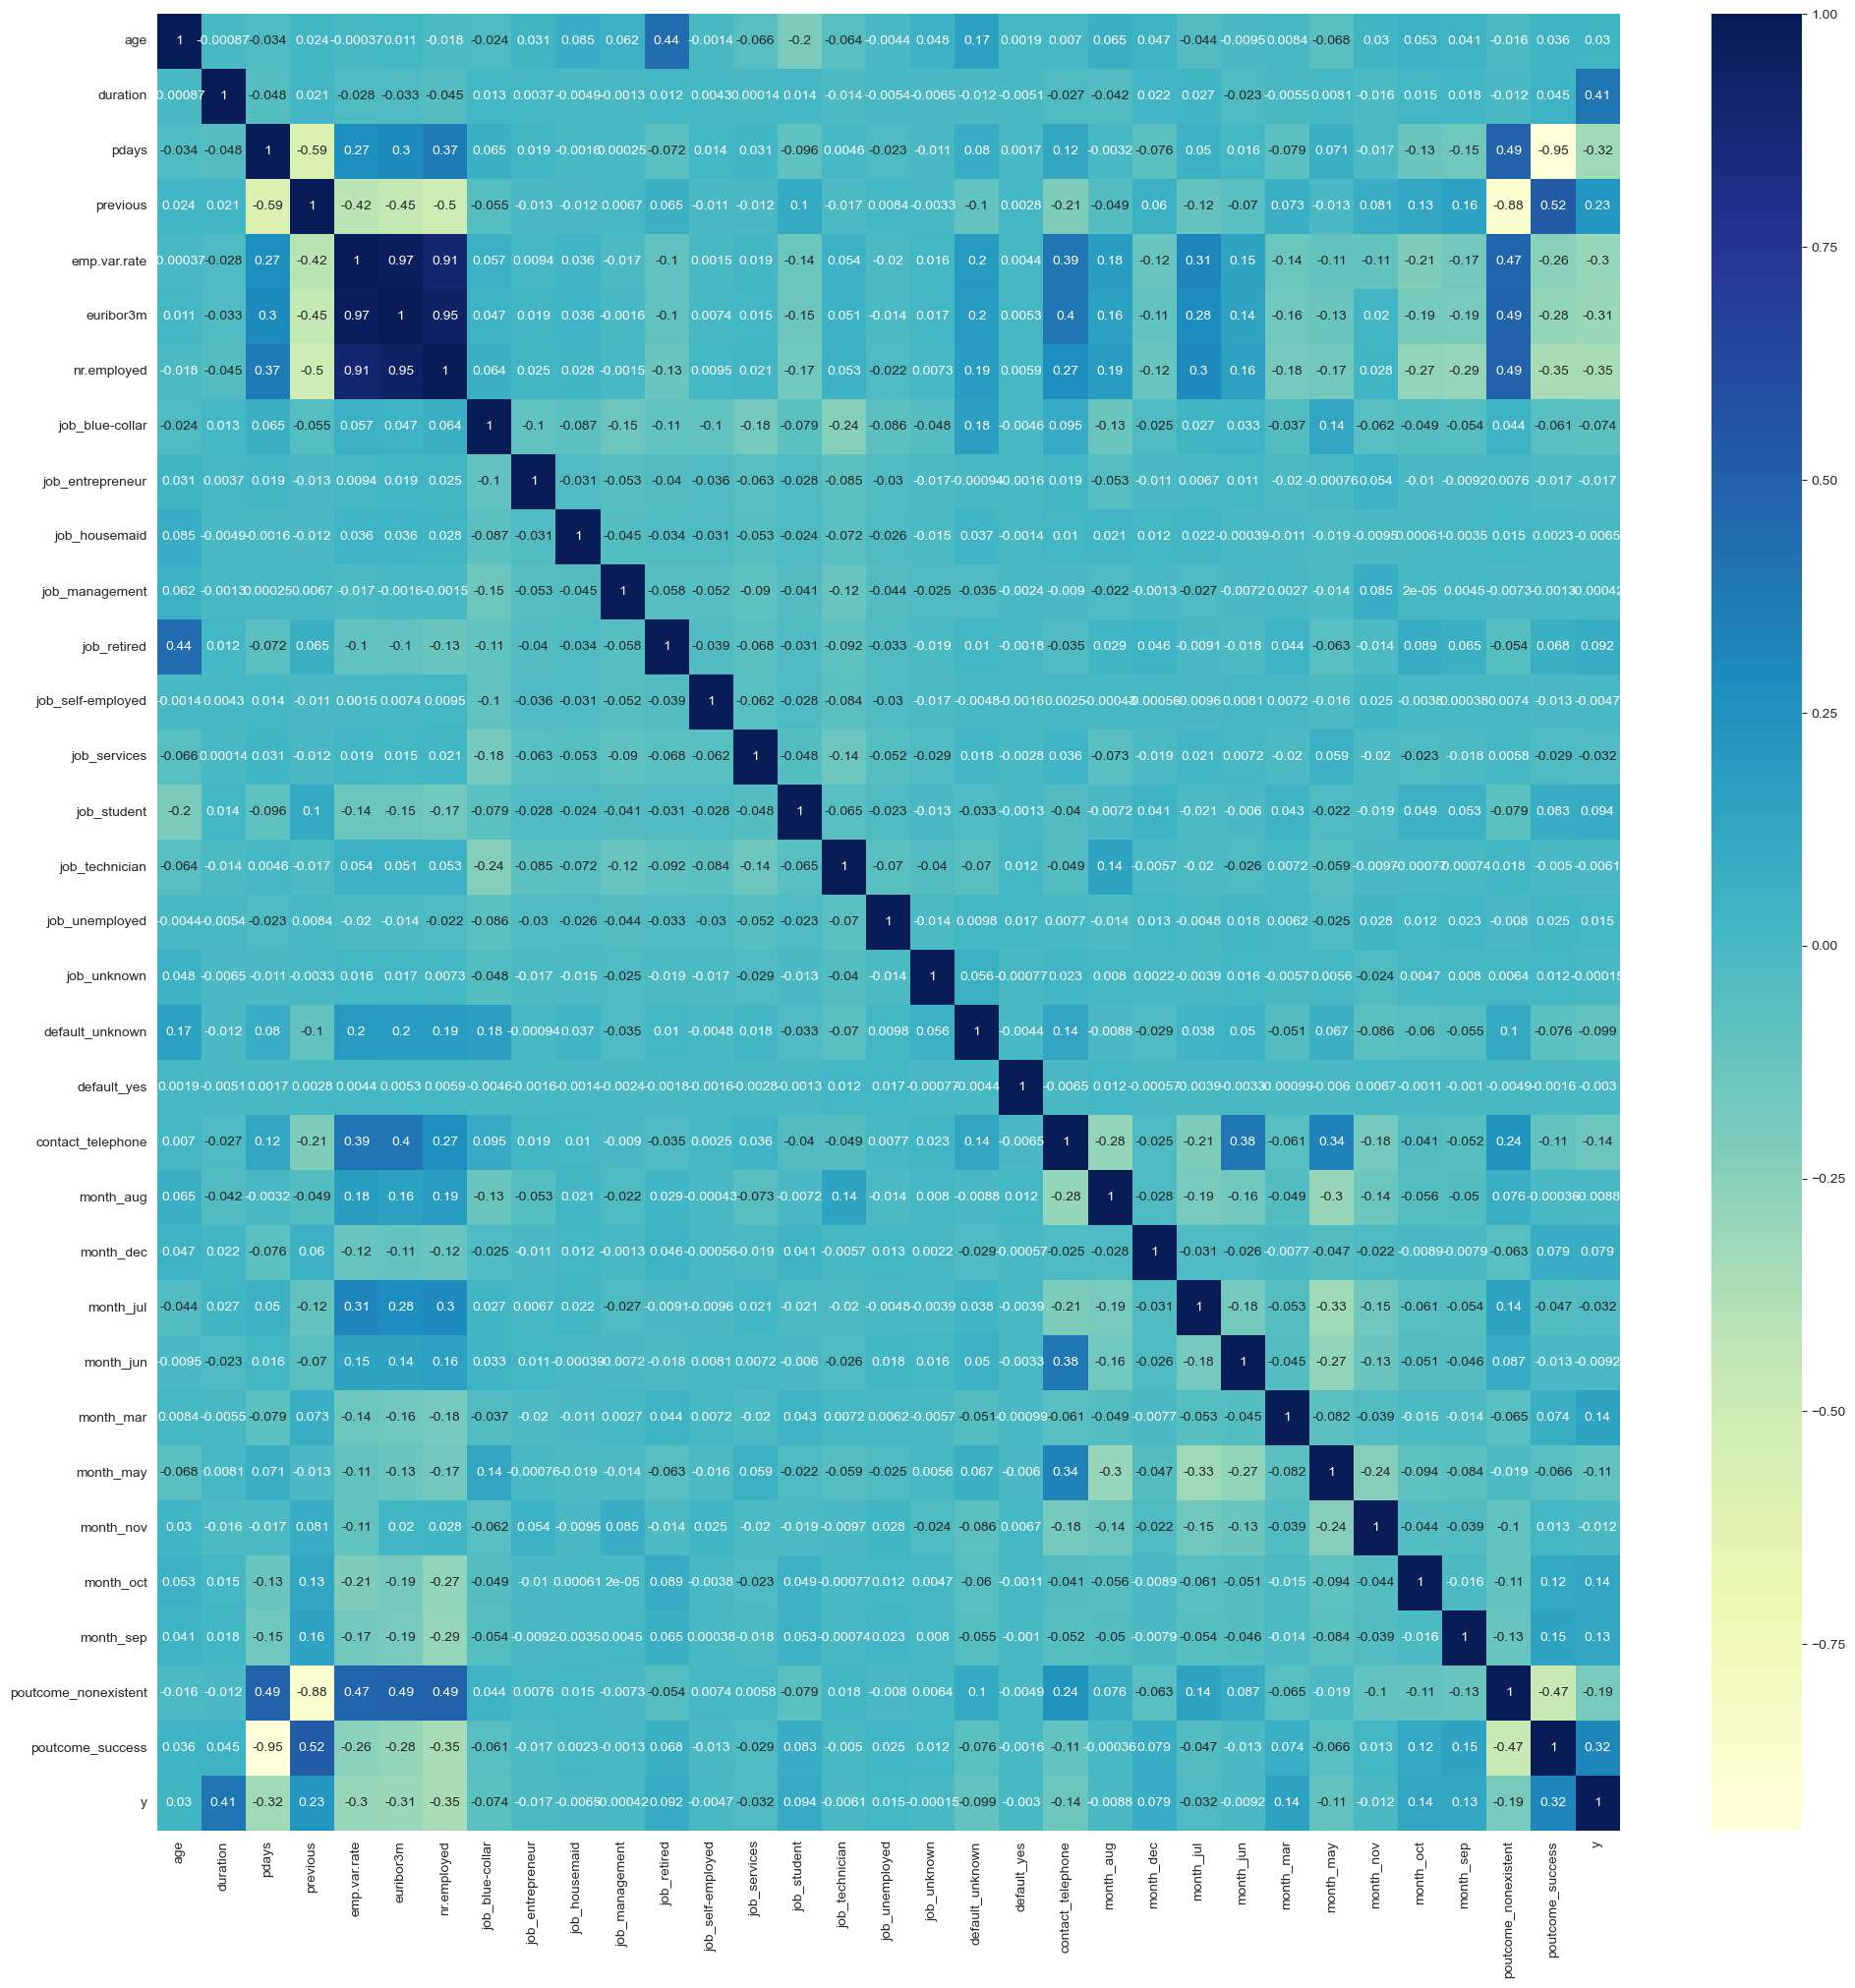

In [113]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="YlGnBu")

<Axes: xlabel='y', ylabel='index'>

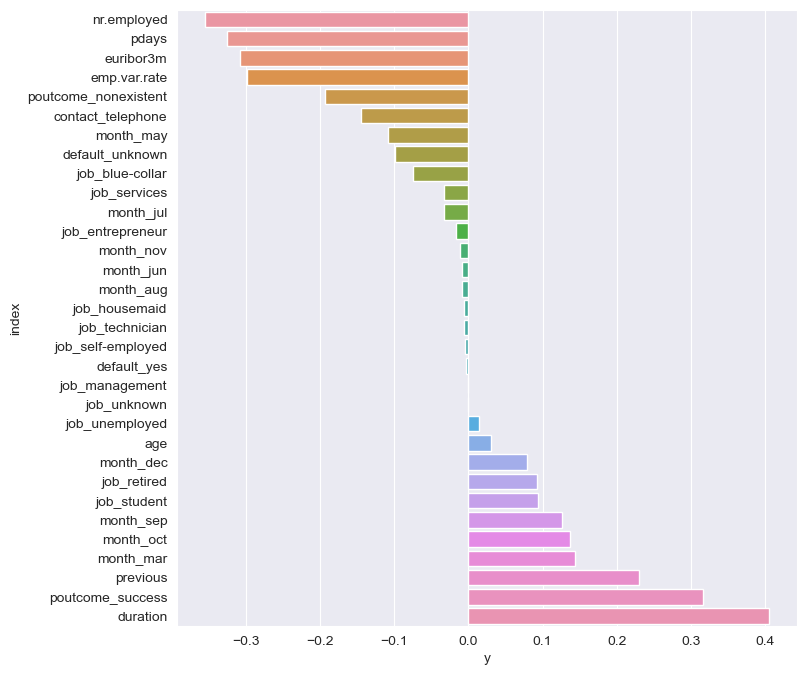

In [115]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
corr = df.corr()['y'].sort_values(ascending=True).reset_index()[0:45]
sns.barplot(data=corr[:-1], x='y',y='index')

In [24]:
df = df.drop(['age','job_unknown','job_unemployed','job_management','default_yes','job_self-employed',
              'job_technician','job_housemaid','month_aug','month_jun','month_nov','job_entrepreneur',
             'month_jul','job_services','job_blue-collar'], axis =1)
df.head()

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,job_retired,job_student,default_unknown,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y
0,261,999,0,1.1,4.857,5191.0,0,0,0,1,0,0,1,0,0,1,0,0
1,149,999,0,1.1,4.857,5191.0,0,0,1,1,0,0,1,0,0,1,0,0
2,226,999,0,1.1,4.857,5191.0,0,0,0,1,0,0,1,0,0,1,0,0
3,151,999,0,1.1,4.857,5191.0,0,0,0,1,0,0,1,0,0,1,0,0
4,307,999,0,1.1,4.857,5191.0,0,0,0,1,0,0,1,0,0,1,0,0


<Axes: xlabel='y', ylabel='index'>

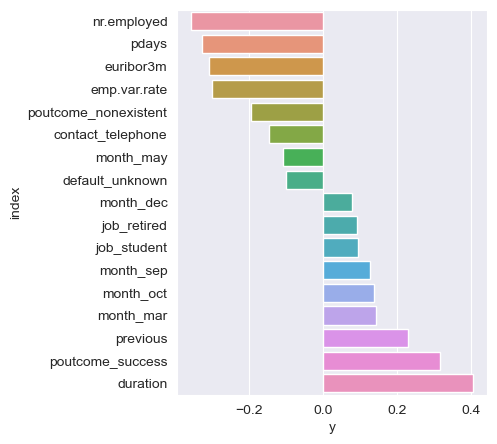

In [27]:
plt.figure(figsize=(4,5))
sns.set_style('darkgrid')
corr = df.corr()['y'].sort_values(ascending=True).reset_index()[0:45]
sns.barplot(data=corr[:-1], x='y',y='index')

In [28]:
df = df.drop(['job_retired', 'job_student', 'default_unknown','contact_telephone', 'month_dec', 'month_may', 'month_oct',
              'month_sep', 'poutcome_nonexistent'], axis =1)
df.head()

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,month_mar,poutcome_success,y
0,261,999,0,1.1,4.857,5191.0,0,0,0
1,149,999,0,1.1,4.857,5191.0,0,0,0
2,226,999,0,1.1,4.857,5191.0,0,0,0
3,151,999,0,1.1,4.857,5191.0,0,0,0
4,307,999,0,1.1,4.857,5191.0,0,0,0


In [26]:
df.columns

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'job_retired', 'job_student', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'y'],
      dtype='object')

In [30]:
# Separación de variables
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#regresion logistica
Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)
#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)
print("Regresion Logistica:", accuracy_score(y_test, y_pred_logr))

# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

#Resumen de los valores obtenidos:
resultados_exp = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost','RegLog'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3),round(accuracy_score(y_test, y_pred_logr),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3),round(precision_score(y_test, y_pred_logr),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3),round(f1_score(y_test, y_pred_logr),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3),round(recall_score(y_test, y_pred_logr),3)], 
      
    } )                               
resultados_exp

Regresion Logistica: 0.9071376547705754
Decision Tree Accuracy: 0.8902646273367322
Random Forest Accuracy: 0.8969410050983249
Gradient Boosting Accuracy: 0.9189123573682932


,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.890,0.517,0.504,0.492
1,RandomF,0.897,0.547,0.540,0.534
2,GBoost,0.919,0.672,0.610,0.558
3,RegLog,0.907,0.656,0.483,0.382


In [29]:
resultados2

NameError: name 'resultados2' is not defined

# Técnicas para minimizar efectos del desbalanceo

En el contexto de una división de entrenamiento y prueba para aprendizaje automático, "estratificar" se refiere a un parámetro utilizado para garantizar que la proporción de clases (o categorías) en la variable objetivo se mantenga consistente en los conjuntos de datos de entrenamiento y prueba.

**Propósito de la estratificación:**

**1. Gestión de conjuntos de datos desequilibrados:**
La estratificación es especialmente crucial al trabajar con conjuntos de datos desequilibrados, donde una o más clases tienen significativamente menos muestras que otras. Sin estratificación, una división aleatoria podría resultar en un conjunto de entrenamiento o prueba sin representación de la clase minoritaria, lo que resulta en un modelo con un rendimiento deficiente en esa clase.

**2. Garantizar muestras representativas:**
Al mantener las proporciones originales de las clases, la división estratificada garantiza que tanto los conjuntos de entrenamiento como los de prueba sean representativos de la distribución general de clases del conjunto de datos. Esto ayuda a construir un modelo más robusto y generalizable.

Regresion Logistica: 0.9086347819049931
Decision Tree Accuracy: 0.8913975884114267
Random Forest Accuracy: 0.9067734887108522
Gradient Boosting Accuracy: 0.9186695799951444


,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.891,0.518,0.518,0.517
1,RandomF,0.907,0.594,0.568,0.545
2,GBoost,0.919,0.675,0.597,0.535
3,RegLog,0.909,0.659,0.492,0.392


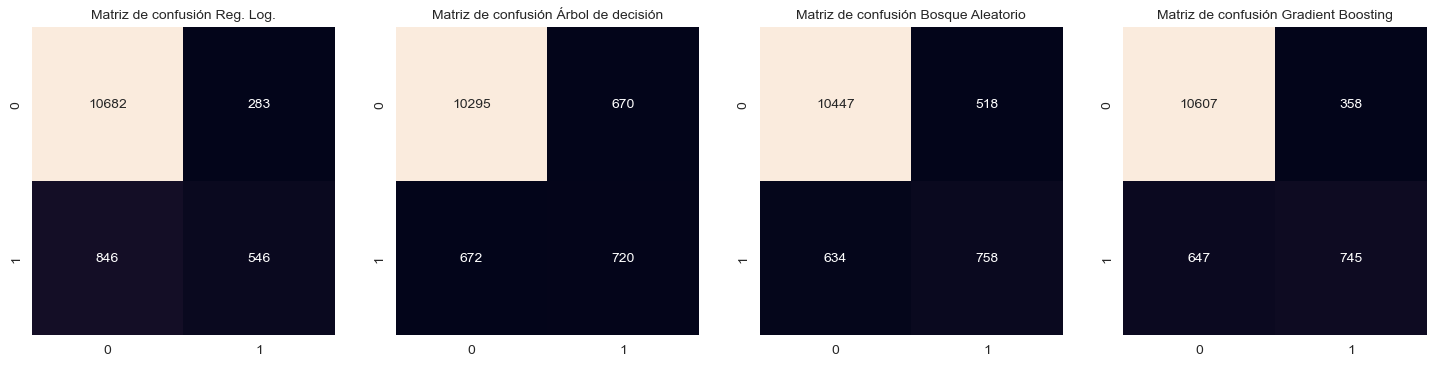

In [129]:
# Separación de variables
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

#regresion logistica
Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)
#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)
print("Regresion Logistica:", accuracy_score(y_test, y_pred_logr))
cm_tunedlr = confusion_matrix(y_test, y_pred_logr)


# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
cm_tuneddt = confusion_matrix(y_test, y_pred_tree)

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cm_tunedrf = confusion_matrix(y_test, y_pred_rf)


# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
cm_tunedgb = confusion_matrix(y_test, y_pred_gb)


#Graficamos las matrices de confusion
fig = plt.figure(figsize= (18, 4))
ax1 = fig.add_subplot(1,4,1)
ax1 = sns.heatmap(cm_tunedlr, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Reg. Log.', fontsize=10)

ax2 = fig.add_subplot(1,4,2)
ax2=sns.heatmap(cm_tuneddt, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Árbol de decisión', fontsize=10)

ax3 = fig.add_subplot(1,4,3)
ax3= sns.heatmap(cm_tunedrf, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Bosque Aleatorio', fontsize=10)

ax4 = fig.add_subplot(1,4,4)
sns.heatmap(cm_tunedgb, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Gradient Boosting', fontsize=10)

#Resumen de los valores obtenidos:
resultados3 = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost','RegLog'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3),round(accuracy_score(y_test, y_pred_logr),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3),round(precision_score(y_test, y_pred_logr),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3),round(f1_score(y_test, y_pred_logr),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3),round(recall_score(y_test, y_pred_logr),3)], 
      
    } )                               
resultados3

# Técnicas de muestreo (Resampling Techniques)

**SMOTEENN y SMOTETomek** son dos de las técnicas híbridas más populares y efectivas en imbalanced-learn para manejar datasets desbalanceados. Combinan el sobremuestreo sintético de la clase minoritaria (SMOTE) con el submuestreo de la clase mayoritaria basado en reglas específicas, lo que ayuda a limpiar el ruido y mejorar la calidad del conjunto de entrenamiento.

**SMOTE (Synthetic Minority Over-sampling Technique):**

Crea nuevas instancias sintéticas de la clase minoritaria. Funciona seleccionando una instancia minoritaria, encontrando sus vecinos más cercanos de la misma clase, y generando nuevas instancias a lo largo de las líneas que conectan la instancia original con sus vecinos.

**ENN (Edited Nearest Neighbours):**

Es una técnica de submuestreo (undersampling) de la clase mayoritaria. Remueve instancias de la clase mayoritaria cuyos k vecinos más cercanos están compuestos mayormente por instancias de la clase minoritaria. Esto ayuda a eliminar instancias de la clase mayoritaria que están cerca de los límites de la clase minoritaria, limpiando el ruido y haciendo los límites más claros.

**Tomek Links:**

Es otra técnica de submuestreo (undersampling). Un "Tomek Link" es un par de instancias de clases diferentes que son los vecinos más cercanos la una de la otra. Es decir, A es el vecino más cercano de B, y B es el vecino más cercano de A, y A y B pertenecen a clases diferentes. La eliminación de Tomek Links generalmente implica eliminar la instancia de la clase mayoritaria de cada par de Tomek Link. Esto ayuda a limpiar la frontera entre las clases.

**Un híbrido**

**SMOTEENN (SMOTE + ENN):** Primero aplica SMOTE para sobremuestrear la clase minoritaria y luego aplica ENN para limpiar el conjunto de datos resultante, eliminando instancias ruidosas (tanto sintéticas como originales) que estén cerca de la clase mayoritaria.

**SMOTETomek (SMOTE + Tomek Links):** Primero aplica SMOTE y luego elimina los Tomek Links que puedan haberse formado, o que ya existían, para limpiar la frontera entre las clases.

In [133]:
# en caso de no tener la libreria instalada 
!pip install imbalanced-learn  

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

Defaulting to user installation because normal site-packages is not writeable


In [137]:
# Separación de variables
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

print("--- Distribución de Clases Original ---")
print(f"Clase 0 (Mayoritaria): {Counter(y)[0]} ({Counter(y)[0]/len(y)*100:.2f}%)")
print(f"Clase 1 (Minoritaria): {Counter(y)[1]} ({Counter(y)[1]/len(y)*100:.2f}%)")
print("-" * 40)


print("\n--- Distribución de Clases en Entrenamiento (Pre-Remuestreo) ---")
print(f"Clase 0: {Counter(y_train)[0]} ({Counter(y_train)[0]/len(y_train)*100:.2f}%)")
print(f"Clase 1: {Counter(y_train)[1]} ({Counter(y_train)[1]/len(y_train)*100:.2f}%)")
print("-" * 40)

# Aplicar SMOTEENN 
print("\n--- Aplicando SMOTEENN ---")
smote_enn = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = smote_enn.fit_resample(X_train, y_train)

print(f"Distribución de Clases Post-SMOTEENN: {Counter(y_res_smoteenn)}")
print(f"Nueva proporción: Clase 0: {Counter(y_res_smoteenn)[0]}, Clase 1: {Counter(y_res_smoteenn)[1]}")
print("-" * 40)
print (len(X_res_smoteenn),len(y_res_smoteenn))

# Aplicar SMOTETomek ---
print("\n--- Aplicando SMOTETomek ---")
smote_tomek = SMOTETomek(random_state=42)
X_res_smotetomek, y_res_smotetomek = smote_tomek.fit_resample(X_train, y_train)

print(f"Distribución de Clases Post-SMOTETomek: {Counter(y_res_smotetomek)}")
print(f"Nueva proporción: Clase 0: {Counter(y_res_smotetomek)[0]}, Clase 1: {Counter(y_res_smotetomek)[1]}")
print("-" * 40)



--- Distribución de Clases Original ---
Clase 0 (Mayoritaria): 36548 (88.73%)
Clase 1 (Minoritaria): 4640 (11.27%)
----------------------------------------

--- Distribución de Clases en Entrenamiento (Pre-Remuestreo) ---
Clase 0: 25583 (88.73%)
Clase 1: 3248 (11.27%)
----------------------------------------

--- Aplicando SMOTEENN ---
Distribución de Clases Post-SMOTEENN: Counter({1: 21370, 0: 20619})
Nueva proporción: Clase 0: 20619, Clase 1: 21370
----------------------------------------
41989 41989

--- Aplicando SMOTETomek ---
Distribución de Clases Post-SMOTETomek: Counter({0: 24852, 1: 24852})
Nueva proporción: Clase 0: 24852, Clase 1: 24852
----------------------------------------


In [142]:
# Aplicar SMOTEENN 
print("\n--- Aplicando SMOTEENN de manera criteriosa---")
smote_enn = SMOTEENN(sampling_strategy = 0.5 ,random_state=42)
X_res_smoteennV, y_res_smoteennV = smote_enn.fit_resample(X_train, y_train)

print(f"Distribución de Clases Post-SMOTEENN: {Counter(y_res_smoteennV)}")
print(f"Nueva proporción: Clase 0: {Counter(y_res_smoteennV)[0]}, Clase 1: {Counter(y_res_smoteennV)[1]}")
print("-" * 40)
print (len(X_res_smoteennV),len(y_res_smoteennV))

# Aplicar SMOTETomek ---
print("\n--- Aplicando SMOTETomek ---")
smote_tomek = SMOTETomek(sampling_strategy = 0.5, random_state=42)
X_res_smotetomekV, y_res_smotetomekV = smote_tomek.fit_resample(X_train, y_train)

print(f"Distribución de Clases Post-SMOTETomek: {Counter(y_res_smotetomekV)}")
print(f"Nueva proporción: Clase 0: {Counter(y_res_smotetomekV)[0]}, Clase 1: {Counter(y_res_smotetomekV)[1]}")
print("-" * 40)



--- Aplicando SMOTEENN de manera criteriosa---
Distribución de Clases Post-SMOTEENN: Counter({0: 21189, 1: 8967})
Nueva proporción: Clase 0: 21189, Clase 1: 8967
----------------------------------------
30156 30156

--- Aplicando SMOTETomek ---
Distribución de Clases Post-SMOTETomek: Counter({0: 24834, 1: 12042})
Nueva proporción: Clase 0: 24834, Clase 1: 12042
----------------------------------------


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresion Logistica: 0.8715707696042729
Decision Tree Accuracy: 0.8826576029780691
Random Forest Accuracy: 0.8899409241725338
Gradient Boosting Accuracy: 0.8809581613660273


,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.883,0.487,0.607,0.805
1,RandomF,0.890,0.507,0.628,0.825
2,GBoost,0.881,0.484,0.624,0.879
3,RegLog,0.872,0.462,0.601,0.857


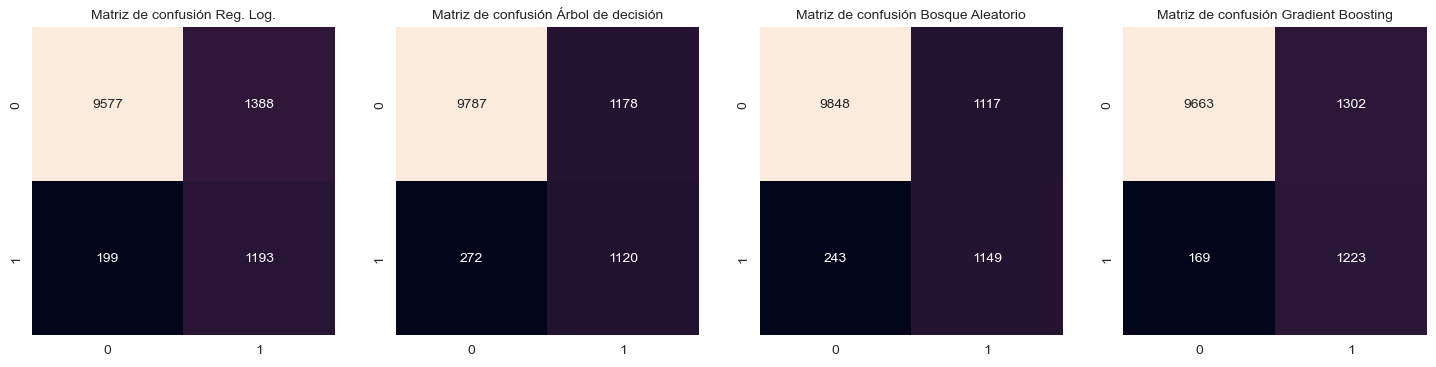

In [143]:
# Usamos los dataset nuevos creados
X_train = X_res_smoteennV
y_train = y_res_smoteennV


#regresion logistica
Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)
#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)
print("Regresion Logistica:", accuracy_score(y_test, y_pred_logr))
cm_tunedlr = confusion_matrix(y_test, y_pred_logr)


# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
cm_tuneddt = confusion_matrix(y_test, y_pred_tree)

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cm_tunedrf = confusion_matrix(y_test, y_pred_rf)


# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
cm_tunedgb = confusion_matrix(y_test, y_pred_gb)


#Graficamos las matrices de confusion
fig = plt.figure(figsize= (18, 4))
ax1 = fig.add_subplot(1,4,1)
ax1 = sns.heatmap(cm_tunedlr, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Reg. Log.', fontsize=10)

ax2 = fig.add_subplot(1,4,2)
ax2=sns.heatmap(cm_tuneddt, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Árbol de decisión', fontsize=10)

ax3 = fig.add_subplot(1,4,3)
ax3= sns.heatmap(cm_tunedrf, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Bosque Aleatorio', fontsize=10)

ax4 = fig.add_subplot(1,4,4)
sns.heatmap(cm_tunedgb, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Gradient Boosting', fontsize=10)

#Resumen de los valores obtenidos:
resultados4 = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost','RegLog'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3),round(accuracy_score(y_test, y_pred_logr),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3),round(precision_score(y_test, y_pred_logr),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3),round(f1_score(y_test, y_pred_logr),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3),round(recall_score(y_test, y_pred_logr),3)], 
      
    } )                               
resultados4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresion Logistica: 0.8931779558145181
Decision Tree Accuracy: 0.8893744436351866
Random Forest Accuracy: 0.9020797928299749
Gradient Boosting Accuracy: 0.8958485069191552


,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.889,0.508,0.541,0.580
1,RandomF,0.902,0.558,0.590,0.624
2,GBoost,0.896,0.525,0.631,0.790
3,RegLog,0.893,0.518,0.612,0.749


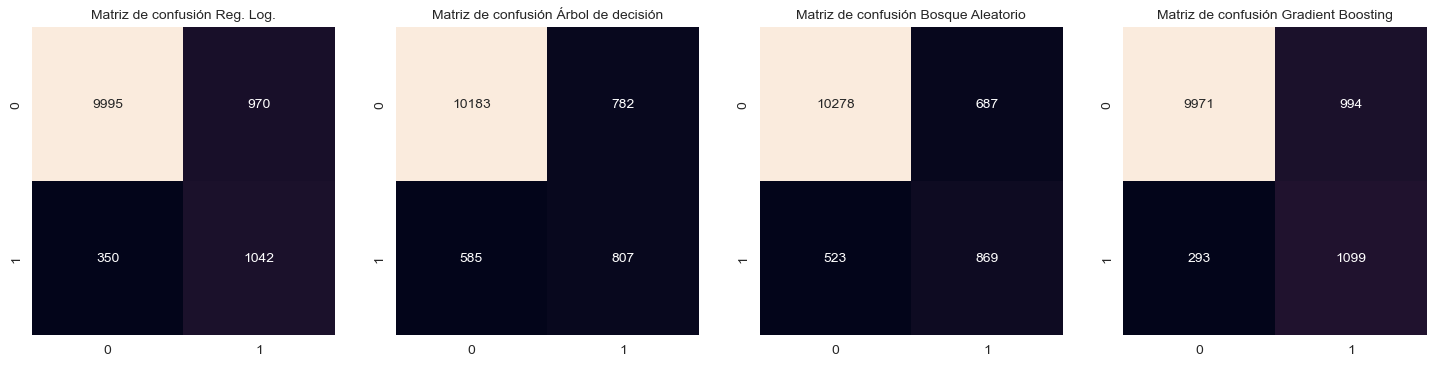

In [157]:
# Usamos los dataset nuevos creados
X_train = X_res_smotetomekV
y_train = y_res_smotetomekV 

#regresion logistica
Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)
#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)
print("Regresion Logistica:", accuracy_score(y_test, y_pred_logr))
cm_tunedlr = confusion_matrix(y_test, y_pred_logr)


# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
cm_tuneddt = confusion_matrix(y_test, y_pred_tree)

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cm_tunedrf = confusion_matrix(y_test, y_pred_rf)


# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
cm_tunedgb = confusion_matrix(y_test, y_pred_gb)


#Graficamos las matrices de confusion
fig = plt.figure(figsize= (18, 4))
ax1 = fig.add_subplot(1,4,1)
ax1 = sns.heatmap(cm_tunedlr, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Reg. Log.', fontsize=10)

ax2 = fig.add_subplot(1,4,2)
ax2=sns.heatmap(cm_tuneddt, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Árbol de decisión', fontsize=10)

ax3 = fig.add_subplot(1,4,3)
ax3= sns.heatmap(cm_tunedrf, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Bosque Aleatorio', fontsize=10)

ax4 = fig.add_subplot(1,4,4)
sns.heatmap(cm_tunedgb, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Gradient Boosting', fontsize=10)

#Resumen de los valores obtenidos:
resultados5 = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost','RegLog'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3),round(accuracy_score(y_test, y_pred_logr),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3),round(precision_score(y_test, y_pred_logr),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3),round(f1_score(y_test, y_pred_logr),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3),round(recall_score(y_test, y_pred_logr),3)], 
      
    } )                               
resultados5

**¿Qué Considerar al Evaluar un F1-Score?**

El Contexto del Problema y las Consecuencias de los Errores:

1. Alto Riesgo/Alto Costo: Si estás detectando enfermedades graves, fraudes financieros, fallas críticas en maquinaria o amenazas a la seguridad, un F1-Score de 0.56 es inaceptable. Los falsos negativos (no detectar un caso positivo real) o los falsos positivos (alarmas innecesarias) pueden tener consecuencias devastadoras. En estos casos, buscarías un F1-Score mucho más alto, idealmente por encima de 0.85 o incluso 0.90, dependiendo de la tolerancia al riesgo.

2. Bajo Riesgo/Bajo Costo: Si tu modelo clasifica correos electrónicos como "interesantes" o "no interesantes", y el error no tiene grandes repercusiones, un F1-Score de 0.56 podría ser un punto de partida para mejorar, pero no necesariamente un fracaso total. Quizás un 0.65 o 0.70 ya sea útil.

**Base de Comparación: Siempre pregúntate: ¿Qué significa este F1-Score en el mundo real para el negocio o el usuario final? ¿Es mejor que una suposición aleatoria o una regla simple?**

**La Dificultad del Problema:** Algunos problemas son inherentemente más difíciles de clasificar que otros debido a la complejidad de los datos, la superposición de clases, la falta de características distintivas o el ruido.

En un problema muy difícil donde incluso los expertos humanos luchan por clasificar con precisión, un F1-Score de 0.56 podría ser un avance significativo. En un problema trivial, sería una señal de que el modelo necesita una mejora sustancial.

**El Rendimiento del Modelo Base (Baseline Model):** Siempre compara tu F1-Score con un modelo de referencia (baseline) simple. Por ejemplo, un modelo que siempre predice la clase mayoritaria, o un clasificador logístico básico. Si tu F1-Score es significativamente mejor que el F1-Score de tu baseline (que podría ser cercano a 0 o muy bajo si la clase positiva es minoritaria), entonces ya es un progreso.

**Interpretando tu F1-Score**
Un F1-Score de 0.5(en una escala de 0 a 1) generalmente se considera mediocre o regular para la mayoría de los problemas prácticos, especialmente si la clase minoritaria es importante.

Significa que tu modelo está logrando un equilibrio aceptable pero no sobresaliente entre la Precisión (cuántas de sus predicciones positivas son correctas) y el Recall (cuántos casos positivos reales logra detectar). Es probable que tenga un número significativo de Falsos Positivos o Falsos Negativos (o ambos).

**¿Qué F1-Score es "Bueno"?**
Aunque no hay una regla estricta, aquí hay una guía general:

1. **0.0 - 0.3: Muy malo**. El modelo no está aprendiendo o es peor que el azar.
2. **0.3 - 0.5: Bajo**. El modelo tiene un rendimiento pobre, muchas predicciones erróneas.
3. **0.5 - 0.7: Regular/Aceptable (con reservas)**. Es un punto de partida. Puede ser útil en contextos de bajo riesgo o como primera iteración, pero hay mucho margen de mejora. Tu 0.56 cae aquí.
4. **0.7 - 0.85: Bueno**. El modelo es sólido y probablemente útil en muchos escenarios.
5. **0.85 - 0.95: Muy bueno**. El modelo es excelente, con pocos errores significativos.
6. **0.95 - 1.0: Excepcional/Casi perfecto**. Muy difícil de lograr en problemas complejos del mundo real.

# Modificación de hyperparámetros

#### **Sintonización de hiperparámetros**
Creamos un diccionario que contiene los diferentes hiperparámetros:

$param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None] # None significa usar todas las características
}$

**PARÁMETROS QUE CONTROLAN EL PROCESO DE BOOSTING O BAGGING (RENDIMIENTO GENERAL)**

**n_estimators**(Números de árboles/etapas de boosting). Controla el número de árboles que se construyen en el ensamble. Un valor alto mejora el rendimiento del modelo, pero aumenta el riesgo de sobreajuste (100-200 son valores comunes)

**learning_rate**(Tasa de aprendizaje)Controla la distribución de cada árbol al modelo final. Reduce el peso de cada árbol. Si lo combinamos con n_estimators alto suele producir modelos robustos y con mejor generalización. Demasiado alto el modelo no converge bien. Es uno de los parámetros más críticos, se recomienda valores de (0.1 a 0.01) y compensarlo con n_estimators alto.

**PARÁMETROS QUE CONTROLAN LA COMPLEJIDAD DE LOS ÁRBOLES INDIVIDUALES (PREVENIR OVERFITTING)**

**max_depth** (Profundidad máxima de cada árbol). Limita el número de divisiones que puede hacer un árbol individual. Un max_depth más profundo permite que los árboles capturen relaciones más complejas, pero aumenta el riesgo de sobreajuste y el tiempo de entrenamiento. Comúnmente se usan valores pequeños (ej., 3-8 para empezar), ya que el ensamble compensa la "debilidad" individual.

**min_samples_split** (Mínimo de muestras para dividir un nodo interno). El número mínimo de ejemplos que un nodo debe contener para que se considere una división. Valores más altos previenen que el árbol aprenda reglas demasiado específicas de pocos ejemplos (reduce sobreajuste). Útil para controlar la fineza de las divisiones.

**min_samples_leaf** (Mínimo de muestras en una hoja) El número mínimo de ejemplos que debe haber en una hoja (nodo terminal) después de una división. Similar a min_samples_split, previene la creación de hojas con muy pocos ejemplos, lo que reduce el sobreajuste. Valores más altos resultan en un árbol más simple y robusto.

**max_features (Número de características a considerar en cada división)** Define el número de características aleatorias que se consideran para buscar la mejor división en cada nodo. Introduce aleatoriedad en la selección de características, que puede reducir la varianza y el sobreajuste, especialmente en datasets con muchas características. Un valor bajo hace que los árboles sean más "débiles" y diversos. Valores comunes son 'auto' (igual a n_features), 'sqrt' (raíz cuadrada del total de características), 'log2', o un número entero.

**PARÁMETROS PARA REDUCIR LA VARIANZA (GENERALIZACIÓN)**

**subsample** parámetro que introduce aleatoriedad y reduce varianza. Define el tamaño de la fracción de muestras aleatorias del conjunto de entrenamiento que se utiliza para entrenar cada árbol individual. Si es < 1.0, se introduce "Stochastic Gradient Boosting". Introduce aleatoriedad, lo que ayuda a reducir la varianza y el sobreajuste. Sin embargo, puede aumentar el sesgo si es demasiado bajo.


Para encontrar los hiperparámetros adecuados utilice técnicas de búsqueda de hiperparámetros:
1. GridSearchCV: Explora sistemáticamente todas las combinaciones de un rango de parámetros definidos. Es exhaustivo pero puede ser lento.
2. RandomizedSearchCV: Muestra aleatoriamente combinaciones de parámetros. Es más rápido y a menudo encuentra buenas soluciones.
3. Optimización Bayesiana (ej., hyperopt, Optuna): Métodos más avanzados que aprenden de los resultados de pruebas anteriores para probar nuevas combinaciones de parámetros de manera más inteligente.


# Por qué son importantes?

Si no controlas estos hiperparámetros, el árbol de decisión seguirá dividiendo los nodos hasta que cada hoja sea perfectamente pura (entropía cero), **lo cual significa que ha memorizado el conjunto de entrenamiento**. Esto resulta en un modelo con bajo sesgo (se ajusta muy bien a los datos de entrenamiento) pero alta varianza (no generaliza bien a datos nuevos), que es la definición de sobreajuste.

La entropía y la ganancia de información son las métricas que el árbol usa para decidir sus divisiones. Los hiperparámetros de poda **(como max_depth, min_samples_split, min_samples_leaf, min_impurity_decrease)** son los mecanismos que usas para controlar qué tan agresivamente el árbol aplica esa búsqueda de ganancia de información.

Iniciando GridSearchCV para sintonización de hiperparámetros (esto puede tardar)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV completado.

--- Mejores Parámetros Encontrados por GridSearchCV ---
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'n_estimators': 300, 'subsample': 1.0}
Mejor F1-Score en validación cruzada: 0.8815

--- Evaluación del Modelo Sintonizado (Best Estimator) ---
Exactitud (Accuracy): 0.9111
Precisión (Precision): 0.5963
Recall (Sensibilidad): 0.6537
F1-Score: 0.6237

Matriz de Confusión del Modelo Sintonizado:


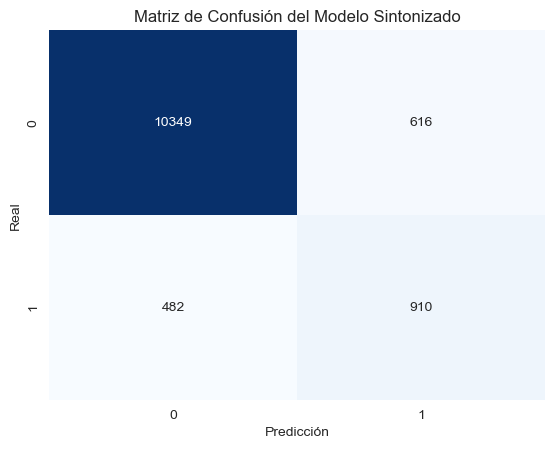

Iniciando RandomizedSearchCV para sintonización (más rápido para rangos grandes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV completado.

--- Mejores Parámetros Encontrados por RandomizedSearchCV ---
Mejores parámetros: {'subsample': 1.0, 'n_estimators': 350, 'max_features': None, 'max_depth': 6, 'learning_rate': 0.105}
Mejor F1-Score en validación cruzada: 0.8839

--- Evaluación del Modelo Sintonizado (RandomizedSearchCV) ---
F1-Score: 0.6267


In [145]:
# --- Sintonización de Hiperparámetros con GridSearchCV (Búsqueda Exhaustiva) ---
# Definir los parámetros a probar y sus rangos
# Tenga en cuenta que GridSearch puede ser computacionalmente intensivo.
# Para este ejemplo, usaremos un rango limitado.
# En un caso real, podría explorar rangos más amplios o usar RandomizedSearchCV primero.

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None] # None significa usar todas las características
}

# Inicializar GridSearchCV
# cv=5 significa 5-fold cross-validation
# scoring='f1' significa que optimizaremos el F1-Score, adecuado para datasets desequilibrados
print("Iniciando GridSearchCV para sintonización de hiperparámetros (esto puede tardar)...")
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1', # O 'accuracy', 'recall', 'precision', dependiendo de su prioridad
    n_jobs=-1,    # Usa todos los núcleos de la CPU disponibles
    verbose=1     # Muestra el progreso
)

grid_search.fit(X_train, y_train)
print("GridSearchCV completado.\n")

# --- Mostrar los Mejores Parámetros y el Mejor Score ---
print("--- Mejores Parámetros Encontrados por GridSearchCV ---")
print("Mejores parámetros:", grid_search.best_params_)
print(f"Mejor F1-Score en validación cruzada: {grid_search.best_score_:.4f}\n")

# --- 9. Evaluar el Modelo con los Mejores Parámetros en el Conjunto de Prueba ---
best_gb_classifier = grid_search.best_estimator_
y_pred_tuned = best_gb_classifier.predict(X_test)

print("--- Evaluación del Modelo Sintonizado (Best Estimator) ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
print("\nMatriz de Confusión del Modelo Sintonizado:")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Modelo Sintonizado')
plt.show()


# --- RandomizedSearchCV (Alternativa más rápida) ---
# Si param_grid es muy grande, RandomizedSearchCV es más eficiente.
# Se define un número de iteraciones (n_iter)
print("Iniciando RandomizedSearchCV para sintonización (más rápido para rangos grandes)...")

param_distributions = {
    'n_estimators': np.arange(50, 400, 50), # Prueba de 50 a 350 en pasos de 50
    'learning_rate': np.linspace(0.01, 0.2, 5), # 5 valores equiespaciados
    'max_depth': np.arange(3, 7), # De 3 a 6
    'subsample': np.linspace(0.6, 1.0, 5),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50, # Número de combinaciones a probar (ej. 50, en lugar de todas)
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42 # Para reproducibilidad de la búsqueda aleatoria
)

random_search.fit(X_train, y_train)
print("RandomizedSearchCV completado.\n")

print("--- Mejores Parámetros Encontrados por RandomizedSearchCV ---")
print("Mejores parámetros:", random_search.best_params_)
print(f"Mejor F1-Score en validación cruzada: {random_search.best_score_:.4f}\n")

# --- 11. Evaluar el Modelo con los Mejores Parámetros de RandomizedSearchCV ---
best_gb_classifier_rand = random_search.best_estimator_
y_pred_rand = best_gb_classifier_rand.predict(X_test)

print("--- Evaluación del Modelo Sintonizado (RandomizedSearchCV) ---")
print(f"F1-Score: {f1_score(y_test, y_pred_rand):.4f}")
# Puede imprimir todas las demás métricas si lo desea

In [171]:
resultados5 = resultados5.append({'Modelo': 'Gb_MejG', 'Accuracy':round(accuracy_score(y_test, y_pred_tuned),3),
 'Presicion':round(precision_score(y_test, y_pred_tuned),3),'F1-Score':round(f1_score(y_test, y_pred_tuned),3),
 'Recall - Sensabilidad':round(recall_score(y_test, y_pred_tuned),3)},ignore_index=True)



C:\Users\leydi\AppData\Local\Temp\ipykernel_10604\2994659288.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados5 = resultados5.append({'Modelo': 'Gb_MejG', 'Accuracy':round(accuracy_score(y_test, y_pred_tuned),3),


In [173]:
resMM = {'Modelo': ['Gb_MejRV'], 'Accuracy':[round(accuracy_score(y_test, y_pred_rand),3)],
 'Presicion':[round(precision_score(y_test, y_pred_rand),3)],'F1-Score':[round(f1_score(y_test, y_pred_rand),3)],
 'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_rand),3)]}

df_resMM = pd.DataFrame(resMM)

pd.concat([resultados5,df_resMM],axis = 0)

,Modelo,Accuracy,Presicion,F1-Score,Recall - Sensabilidad
0,Tree,0.889,0.508,0.541,0.580
1,RandomF,0.902,0.558,0.590,0.624
2,GBoost,0.896,0.525,0.631,0.790
3,RegLog,0.893,0.518,0.612,0.749
4,Gb_MejG,0.911,0.596,0.624,0.654
0,Gb_MejRV,0.911,0.592,0.627,0.665
